# Load the patches of patient-X and see what the patches look like.
First load the patches.

In [7]:
import scipy.io as sio
patches = sio.loadmat('../data/matlab/patches_patient_3.mat')
patches = patches['patches']

print('number of patches:\t', len(patches))
print('length of a patch:\t', len(patches[0]))

number of patches:	 159
length of a patch:	 3072


Now visualize the patches.
For the first window.

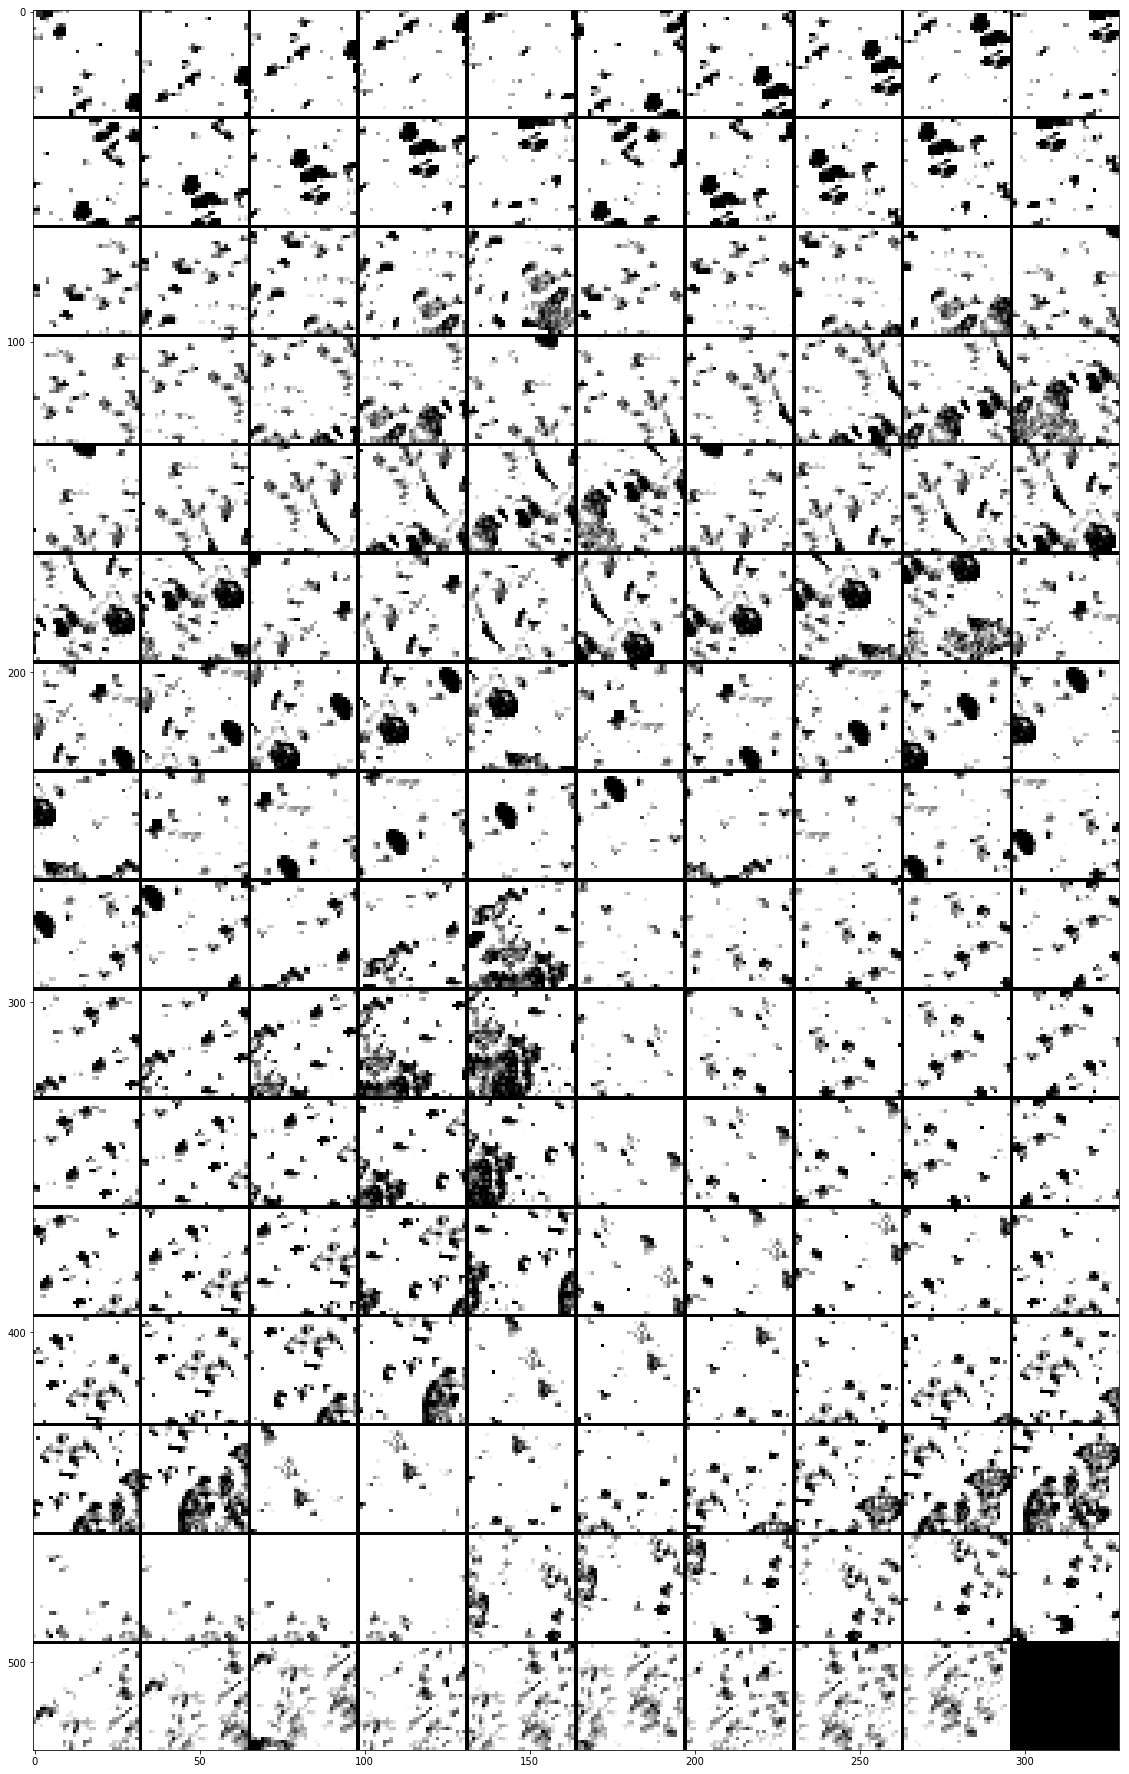

In [8]:
import numpy as np
from matplotlib import pyplot as plt

padding = 1
grid_width = 10
grid_height = round(len(patches)/grid_width)
pic_length = 32
window_length = 1024
num_height = grid_height * pic_length + (grid_height-1) * padding
num_width = grid_width * pic_length + (grid_width-1) * padding

img = np.zeros((num_height, num_width))
for i in range(len(patches)):
    for j in range(window_length):
        x = int(j / pic_length) + int(i / grid_width) * (pic_length+padding)
        y = j % pic_length + (i % grid_width) * (pic_length+padding)
        img[x][y] = patches[i][j]

plt.imshow(img)
plt.gray()
plt.show()

For the second window

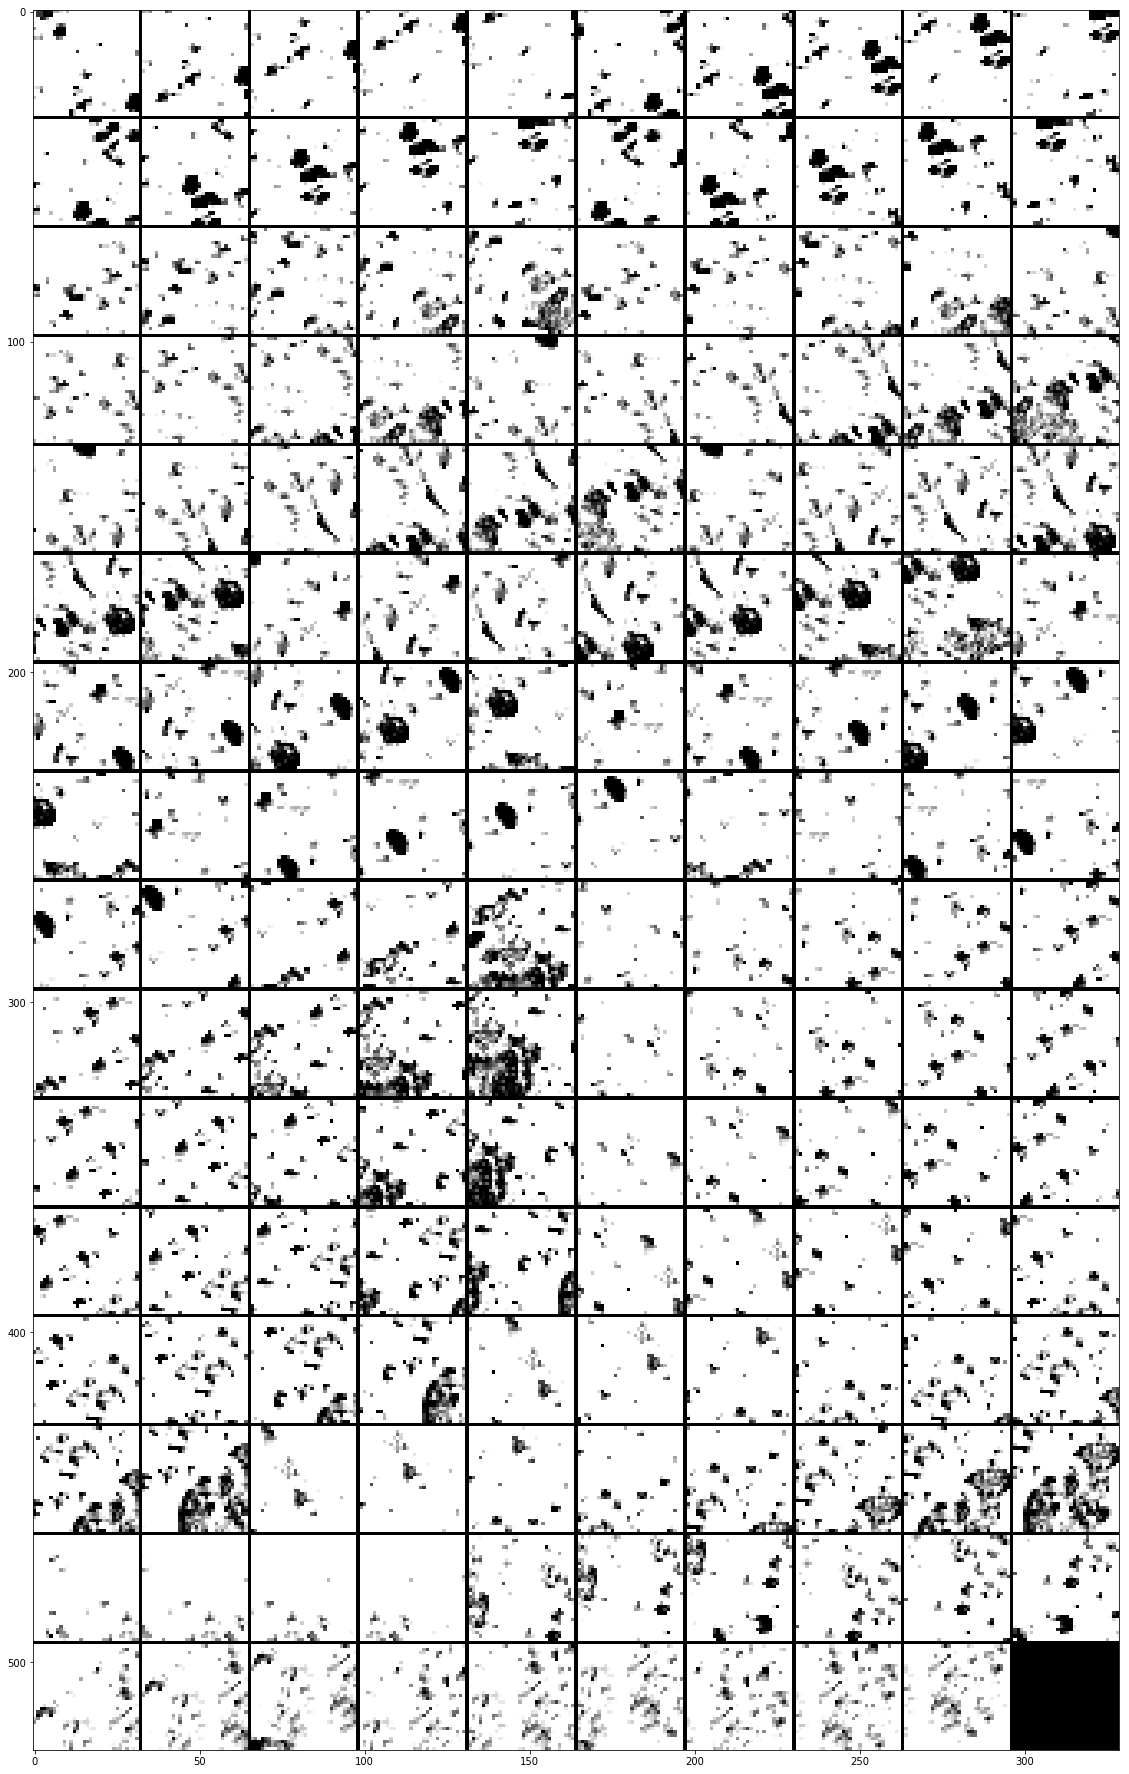

In [9]:
img = np.zeros((num_height, num_width))
for i in range(len(patches)):
    for j in range(window_length):
        x = int(j / pic_length) + int(i / grid_width) * (pic_length+padding)
        y = j % pic_length + (i % grid_width) * (pic_length+padding)
        img[x][y] = patches[i][j+1024]

plt.imshow(img)
plt.gray()
plt.show()

For the third window

0.0


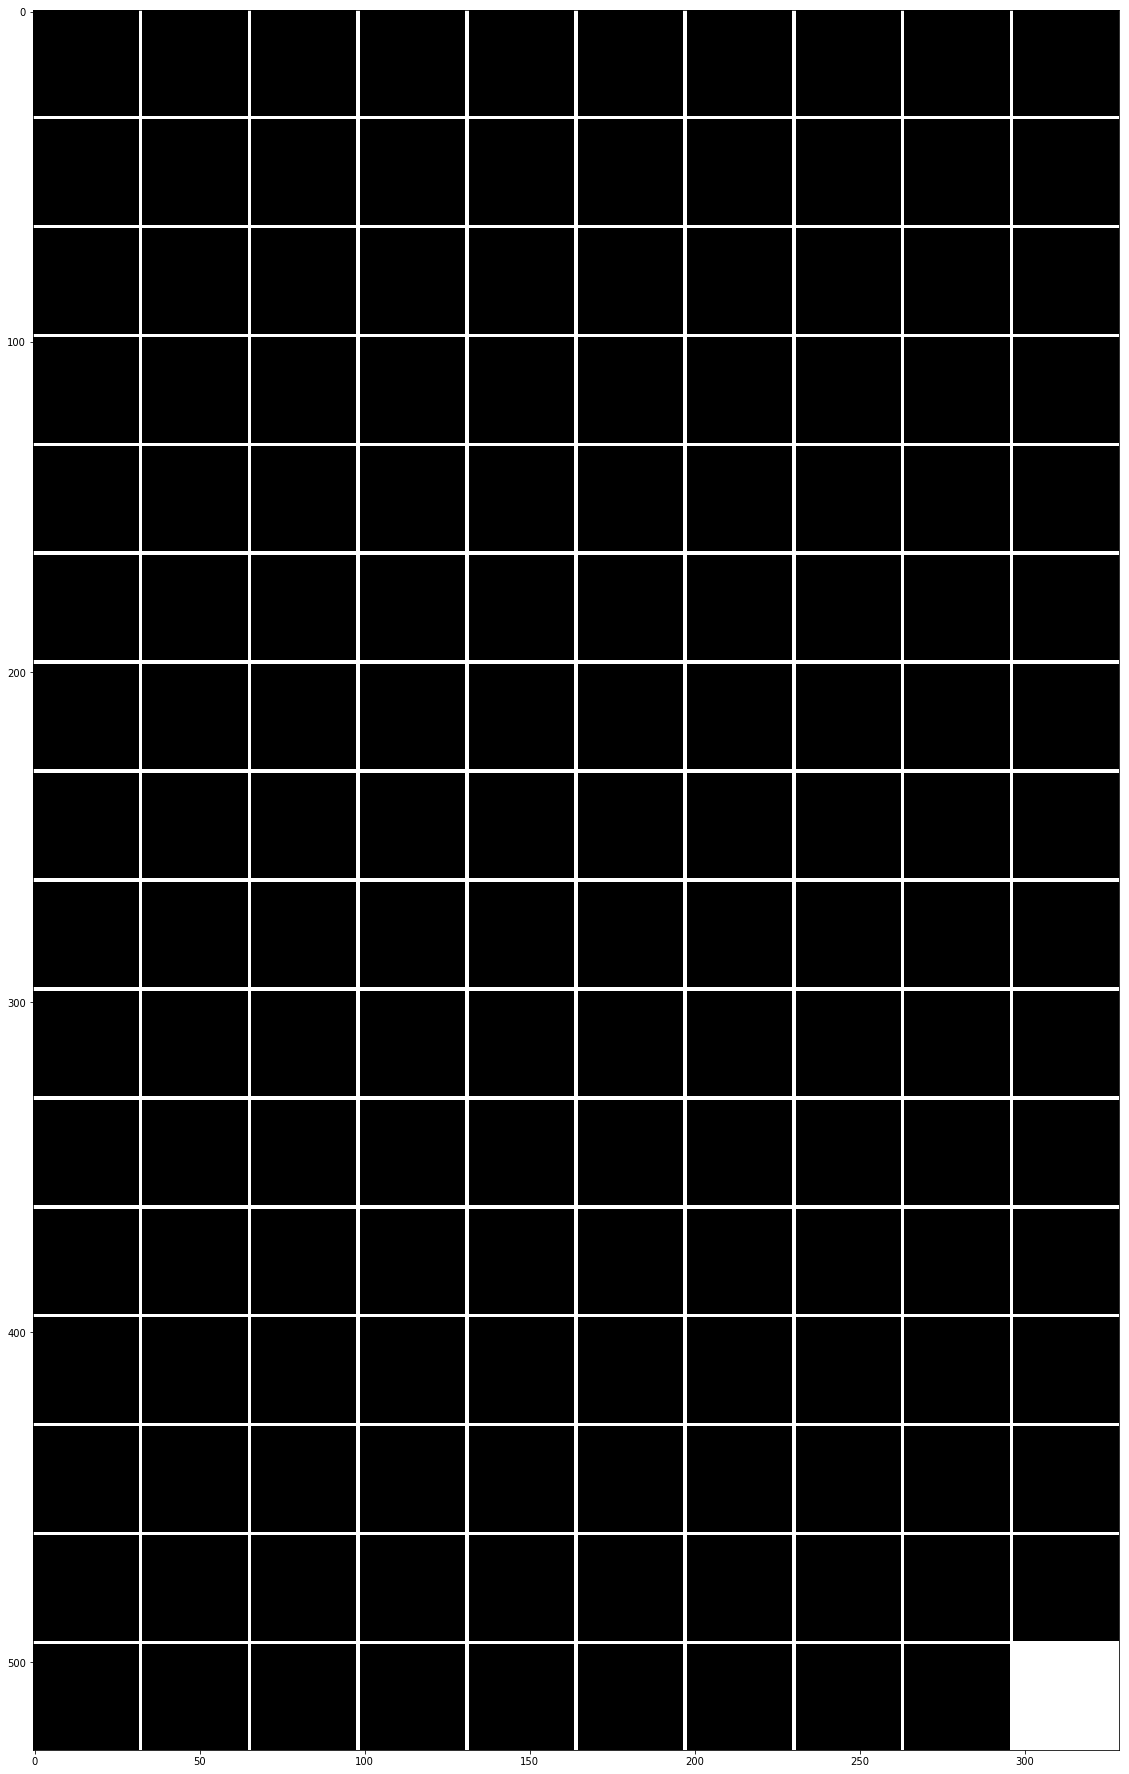

In [14]:
img = np.ones((num_height, num_width))
for i in range(len(patches)):
    for j in range(window_length):
        x = int(j / pic_length) + int(i / grid_width) * (pic_length+padding)
        y = j % pic_length + (i % grid_width) * (pic_length+padding)
        img[x][y] = patches[i][j+2048]
plt.imshow(img)
plt.gray()
plt.show()

The combination of three windows

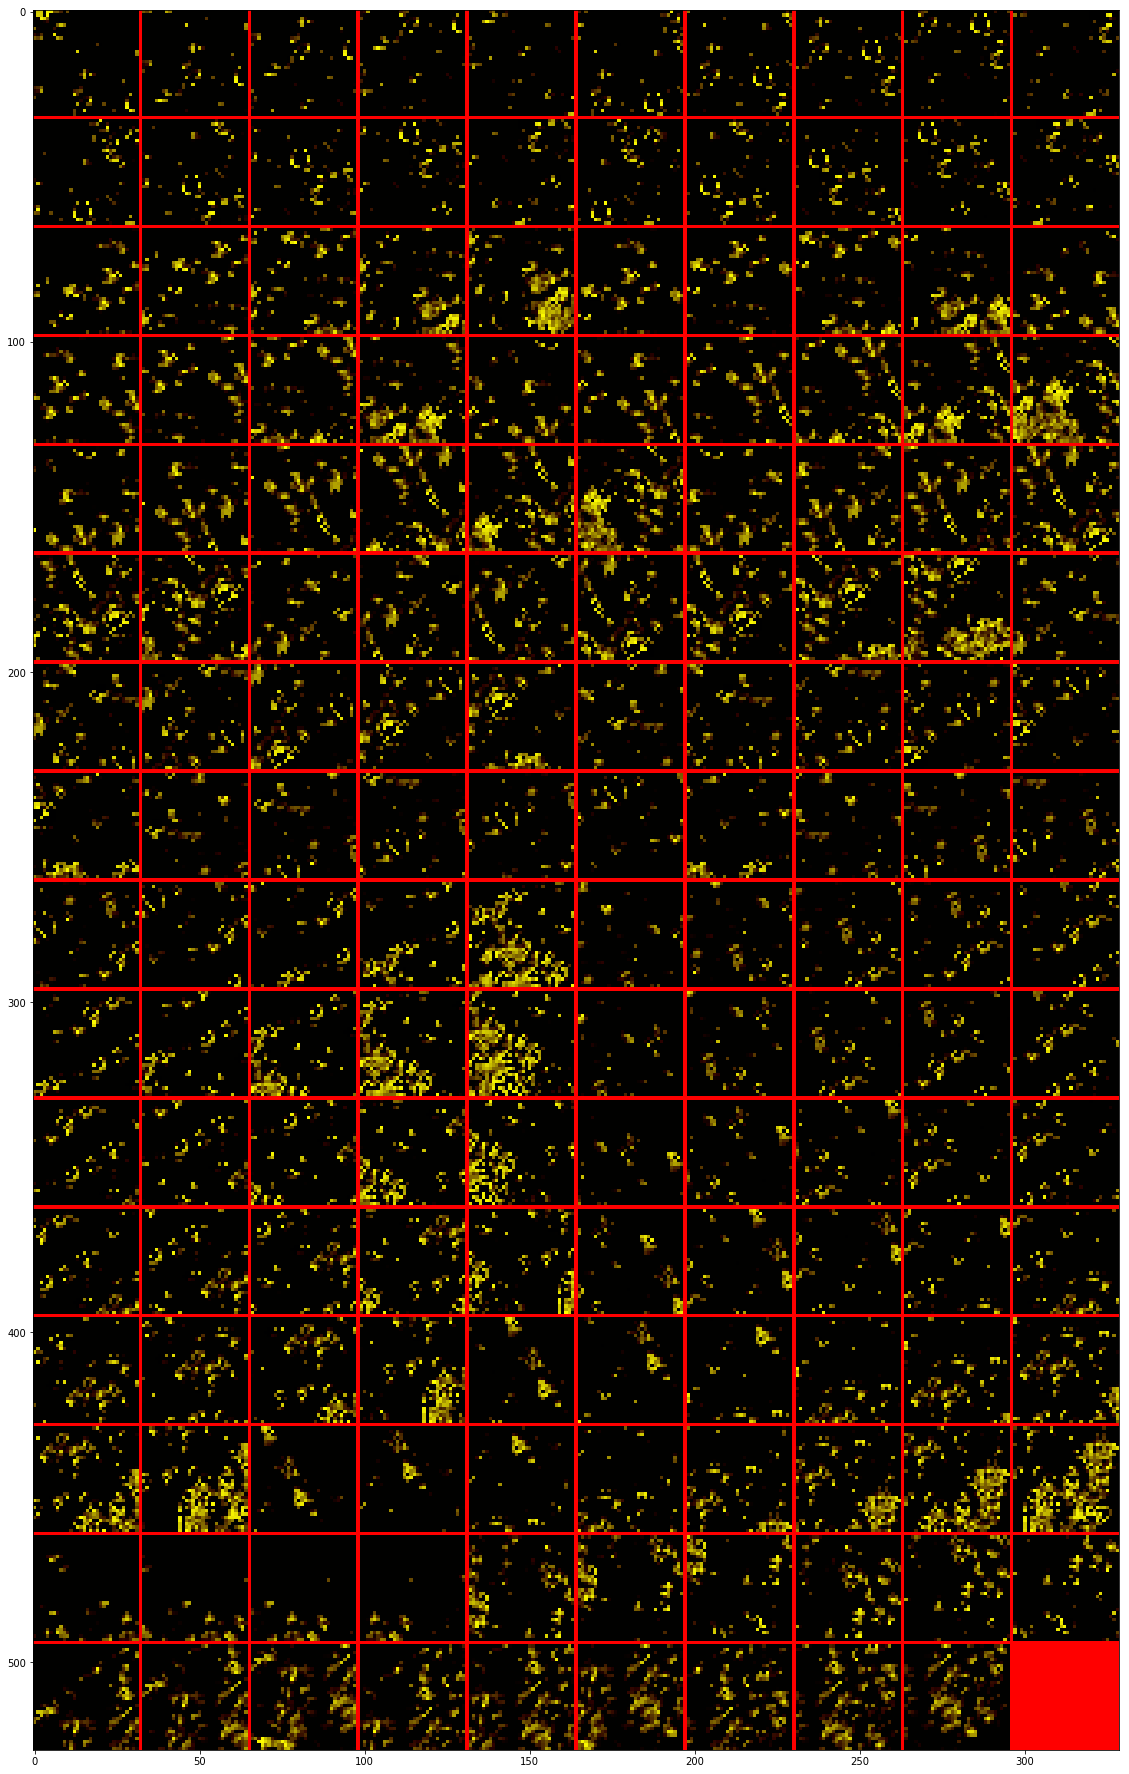

In [12]:
img = np.zeros((num_height, num_width, 3))
for i in range(num_height):
    for j in range(num_width):
        img[i][j][0] = 1
for i in range(len(patches)):
    for j in range(window_length):
        x = int(j / pic_length) + int(i / grid_width) * (pic_length+padding)
        y = j % pic_length + (i % grid_width) * (pic_length+padding)
        img[x][y][0] = patches[i][j]
        img[x][y][1] = patches[i][j+1024]
        img[x][y][2] = patches[i][j+2048]

plt.imshow(img)
plt.show()